In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [7]:
setwd('/import/DB/fel/BJTC-204')

In [8]:
load('./exp4.rda')

In [9]:
ls()

[1] "exp4"

In [10]:
#exp4[,8:dim(exp4)[2]] = 2^exp4[,8:dim(exp4)[2]] -1

In [11]:
dim(exp4)

[1]   251 11882

In [12]:
head(exp4)

,death,TYPE,PH,Gender,race,Age,GSM,NAT2,ADA,CDH2,...,HNRPDL,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,0,Control,6.97,M,Caucasian,32,GSM2431721,6.918508,5.958536,7.389671,...,8.062601,8.039051,6.266754,4.402844,6.107446,5.091350,7.473668,7.085446,5.301909,5.986224
GSM2431722,0,Control,7.01,F,Caucasian,63,GSM2431722,6.397328,6.113981,7.629390,...,9.066047,8.447141,6.887356,4.383695,5.726334,4.867468,7.710730,7.402328,5.598268,6.171961
GSM2431723,0,Control,NA,F,Caucasian,70,GSM2431723,6.814676,6.261580,7.571414,...,8.630200,8.170023,6.914393,4.441707,5.981377,4.979711,7.519356,7.314417,5.538427,5.854754
GSM2431726,0,Control,NA,M,Caucasian,71,GSM2431726,7.550068,6.640444,8.030948,...,6.794395,7.583125,6.374021,4.632824,6.542643,5.345686,8.181581,6.815460,5.552289,6.125526
GSM2431727,0,Control,6.87,M,Caucasian,44,GSM2431727,6.336289,6.297053,7.947093,...,9.055285,8.653470,6.902694,4.552302,5.629537,5.043913,7.322026,7.413795,5.617718,5.891519
GSM2431728,0,MDD,7.05,M,Caucasian,66,GSM2431728,6.266404,5.972297,7.826966,...,8.993547,8.454228,6.859039,4.488690,5.823510,4.932490,7.483323,7.521739,5.512290,6.347157


In [19]:
data = exp4[,c('TYPE','TEF')]

In [22]:
data$TYPE = ifelse(data$TYPE == 'MDD',1,0)

In [23]:
fold_pre <- glm(TYPE~.,data=data,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)
options(repr.plot.width = 6)

Setting levels: control = 0, case = 1

Setting direction: controls > cases



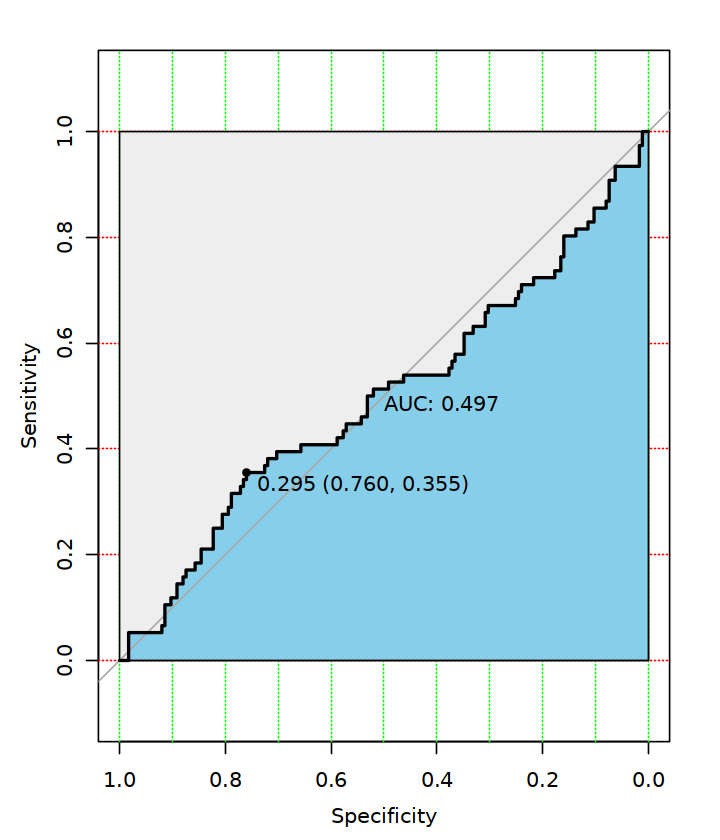

In [24]:
roc_curve <- pROC::roc(as.numeric(data$TYPE),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")